# サンクトペテルブルクのパラドックス
- [Wikipedia](https://ja.wikipedia.org/wiki/サンクトペテルブルクのパラドックス)

## python 練習
- 関数の型定義
- joblib
    - n_jobs: -1 設定で最大化
    - verbose: ログの出力頻度設定 0 〜 10
- rolling() 関数
    - center: True にするとウィンドウの中心位置に値が返る
    - min_periods: ウィンドウの最小要素数（min_periods 以上であればウィンドウ幅に足りなくても計算が行われる）
- figsize パラメータ: (横インチ, 縦インチ）で指定
- plt.ylim() 関数

In [1]:
from joblib import Parallel, delayed
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import random
import seaborn as sns

sns.set()

In [2]:
PLAYER    = 100   # サンプリング数
MAX_TRIAL = 1000  # 1 サンプルの最大試行回数

In [3]:
def play() -> int:
    k = 0
    while random.random() < 0.5:
        k += 1
    return 2**k

In [4]:
def get_result(trial):
    samples = [[play() for _ in range(trial)] for _ in range(PLAYER)]
    return pd.DataFrame({
        'trial'    : [trial],
        'Mean(Mean(one user\'s gain))': [np.mean([np.mean(s) for s in samples])],
        'Median(Mean(one user\'s gain))': [np.mean([np.median(s) for s in samples])],
        'Mean(Median(one user\'s gain))': [np.median([np.mean(s) for s in samples])],
        'Median(Median(one user\'s gain))': [np.median([np.median(s) for s in samples])],
    })

result = Parallel(n_jobs=-1, verbose=10)([delayed(get_result)(trial) for trial in range(1, MAX_TRIAL + 1)])
result = pd.concat(result).sort_values(['trial',])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1754s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1132s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:   10.8s
[Parallel(n_jo

(0, 20)

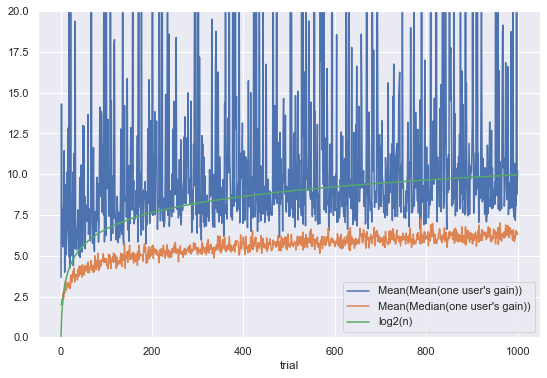

In [5]:
result['log2(n)'] = result.trial.map(lambda x: np.log2(x))
result['Mean(Mean(one user\'s gain))_window'] = result['Mean(Mean(one user\'s gain))'].rolling(20, center=True, min_periods=2).mean()
result.set_index('trial')[['Mean(Mean(one user\'s gain))', 'Mean(Median(one user\'s gain))', 'log2(n)',]].plot(figsize=(9, 6))
plt.ylim([0,20])